<h1 style="font-size:5rem;color:green;">Basic Codes</h1>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx

## Open a file

In [2]:
EdgeList = open ("EdgeList1.txt", 'rb') # 'rb': read-binary
G = nx.read_edgelist(EdgeList, nodetype=int) # edges on each line of the input
EdgeList.close() # we can close the file now

## Draw an Undirected graph

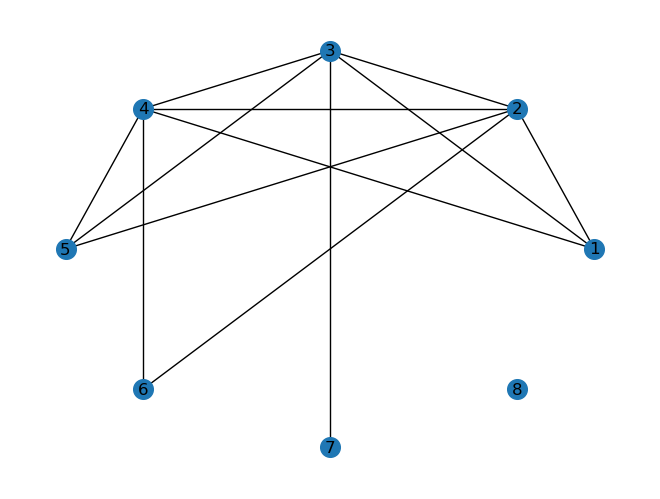

In [3]:
G.add_node('8') # Isolated node
nx.draw_circular(G, node_color='C0',node_size=200,with_labels=True)
plt.show()

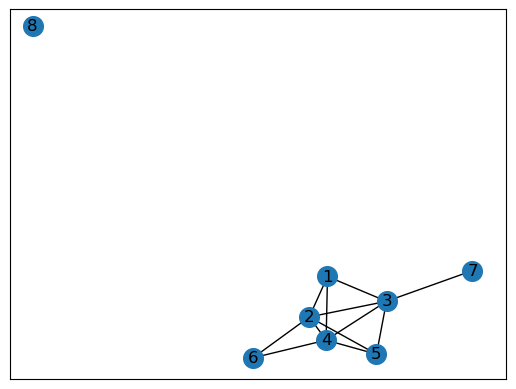

In [4]:
nx.draw_networkx(G,node_color='C0',node_size=200, with_labels=True)
plt.show()

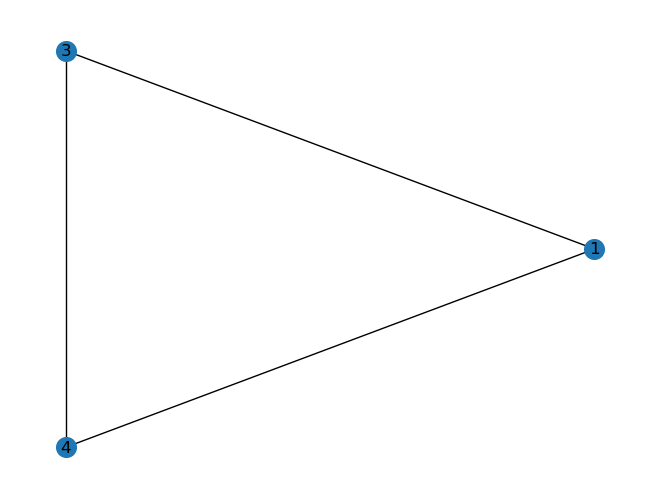

Subgraph edges: [(1, 3), (1, 4), (3, 4)]
Subgraph nodes: [1, 3, 4]


In [5]:
# Subgraph
H = G.subgraph([1,3,4])
subedges = list(H.edges())
H.nodes()
nx.draw_circular(H, node_color='C0',node_size=200,with_labels=True) # draw subgraph
plt.show()
print(f"Subgraph edges: {subedges}")
print(f"Subgraph nodes: {H.nodes}")

## Draw a Directed Graph

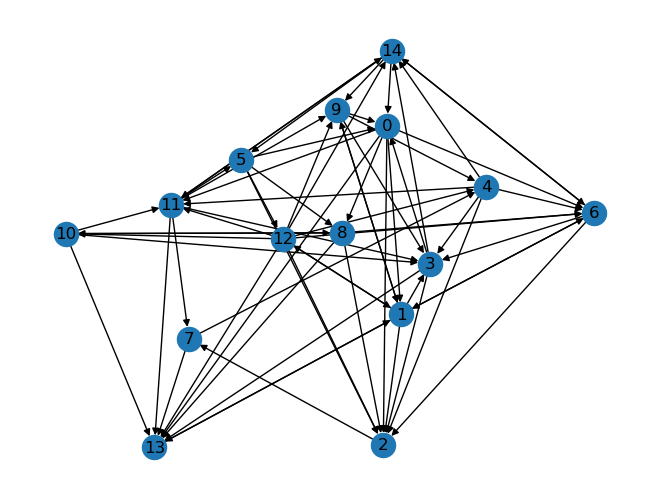

In [6]:
DG = nx.fast_gnp_random_graph(15,0.3,directed=True)
nx.draw(DG,with_labels=True)

In [7]:
print("In-degrees")
nodes = []
for n in DG.nodes():
    print(f'{n}: {DG.in_degree(n)}')

In-degrees
0: 4
1: 5
2: 8
3: 6
4: 3
5: 2
6: 6
7: 2
8: 3
9: 4
10: 2
11: 5
12: 2
13: 8
14: 5


In [8]:
print("Out-degrees")
nodes = []
for n in DG.nodes():
    print(f'{n}: {DG.out_degree(n)}')

Out-degrees
0: 6
1: 6
2: 1
3: 4
4: 5
5: 4
6: 4
7: 2
8: 4
9: 4
10: 4
11: 6
12: 9
13: 1
14: 5


## Degree of nodes

In [9]:
G.degree ()

DegreeView({1: 3, 2: 5, 3: 5, 4: 5, 5: 3, 6: 2, 7: 1, '8': 0})

In [10]:
# This is a sequence generator. Note the square brackets the RHS of assignment statement.
degree_sequence = [d for n, d in G.degree()]
# d for n, d in G.degree(): contents in G.degree, indexed d, for n (1 to n)
print(f"Degree sequence {degree_sequence}") 

Degree sequence [3, 5, 5, 5, 3, 2, 1, 0]


In [11]:
degreeHist = {} # create a vector
for d in degree_sequence:
    if d in degreeHist:
        degreeHist[d]+= 1 #if there is a degree d increment the number of occurrances by one
    else:
        degreeHist[d] = 1

print ("degree #of_nodes")
for d in degreeHist:
    print(f"{d:4}  {degreeHist[d]:6}") # the :4 or :6 make a space size 4 or 6

degree #of_nodes
   3       2
   5       3
   2       1
   1       1
   0       1
